# STUDENT HEALTH DATA -EDA AND ML MODELLING

In [124]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [125]:
df = pd.read_csv("Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# EDA

In [126]:
newnames = ["Timestamp", "Gender", "Age", "Course", "Year", "CGPA", "Married", "Depression", "Anxiety", "Panic Attacks", "Treated"]
df.columns = newnames
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Married,Depression,Anxiety,Panic Attacks,Treated
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [127]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
Timestamp        0
Gender           0
Age              1
Course           0
Year             0
CGPA             0
Married          0
Depression       0
Anxiety          0
Panic Attacks    0
Treated          0
dtype: int64


In [128]:
#filling the only miossing value in age column with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [130]:
  df.dtypes

Timestamp         object
Gender            object
Age              float64
Course            object
Year              object
CGPA              object
Married           object
Depression        object
Anxiety           object
Panic Attacks     object
Treated           object
dtype: object

In [131]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [132]:
df.loc[df['Year']=='Year 1','Year']='year 1'
df.loc[df['Year']=='Year 2','Year']='year 2'
df.loc[df['Year']=='Year 3','Year']='year 3'

In [133]:
df['Course'].replace({'engin': 'Engineering' ,
                        'Engine':'Engineering' ,
                        'Islamic education':'Islamic Education' ,
                        'Pendidikan islam':'Pendidikan Islam' ,
                        'BIT':'IT', 'psychology':'Psychology',
                        'koe': 'Koe',
                        'Kirkhs': 'Irkhs',
                        'KIRKHS': 'Irkhs',
                        'Benl': 'BENL',
                        'Fiqh fatwa ': 'Fiqh',
                        'Laws': 'Law'} , inplace = True)

In [134]:
df['CGPA'].replace('3.50 - 4.00 ','3.50 - 4.00',inplace=True)


In [135]:
df=df.drop(columns=['Timestamp'])

# VISUALISATION

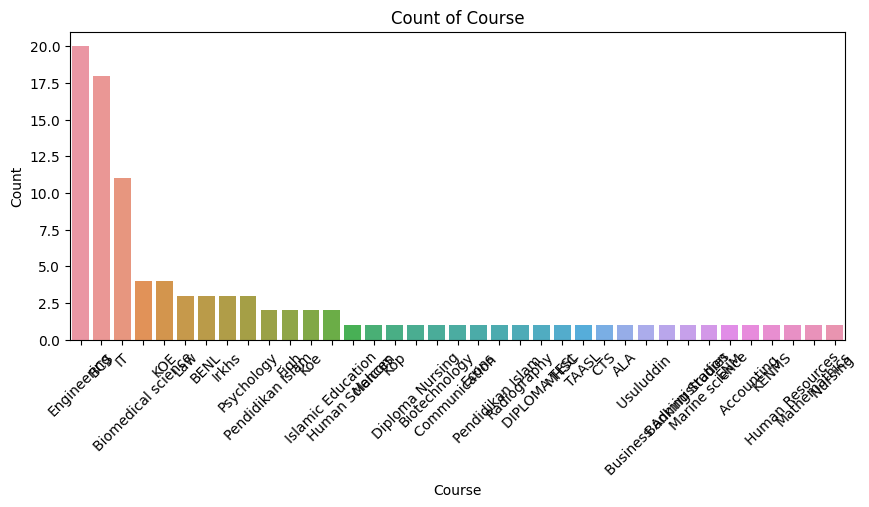

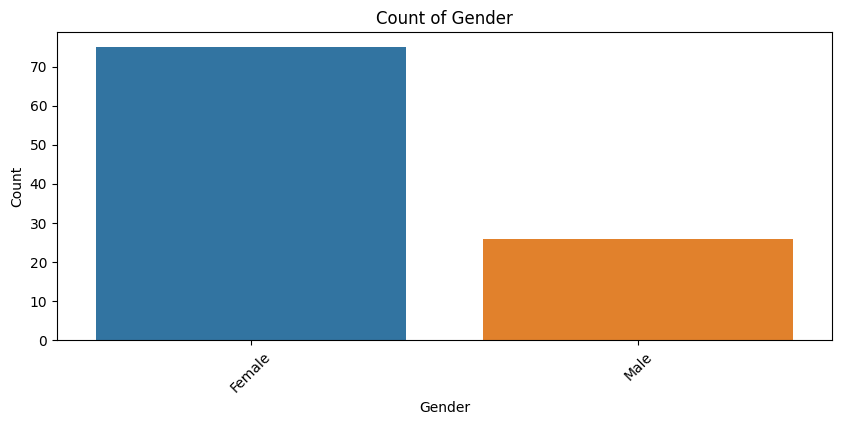

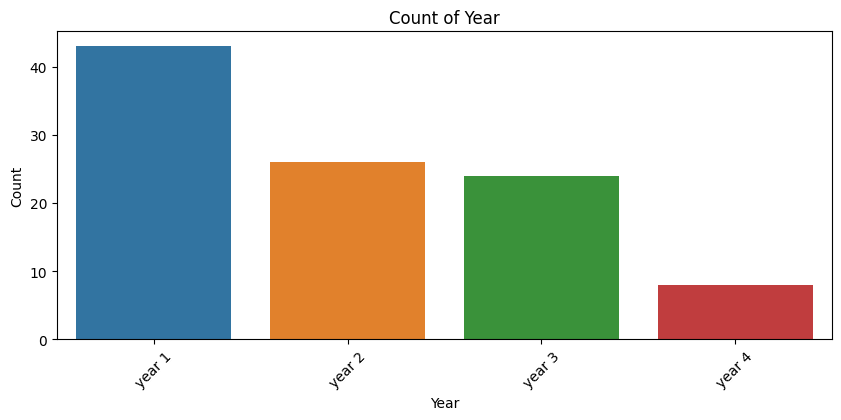

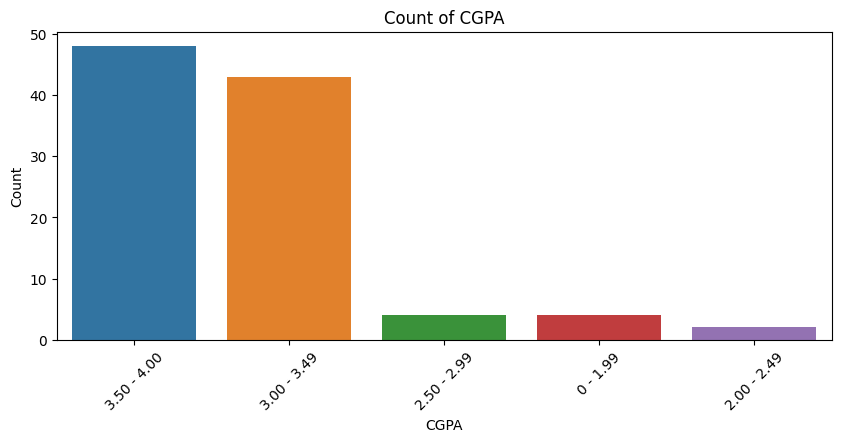

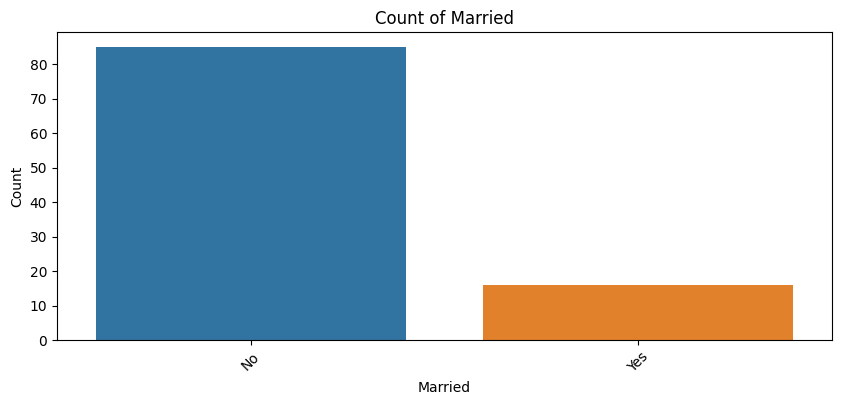

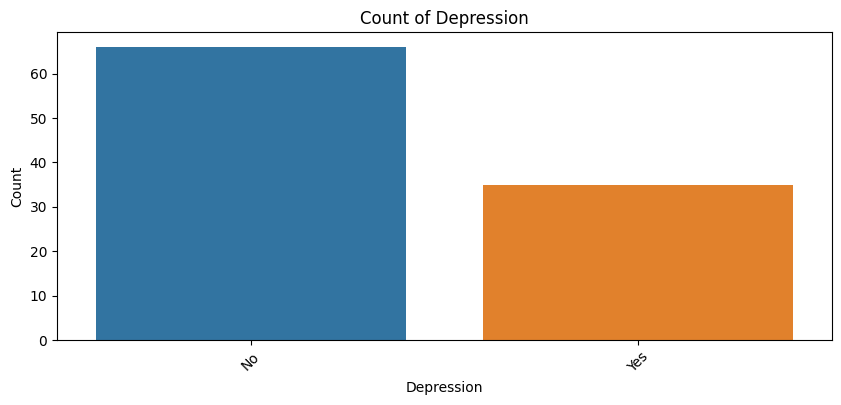

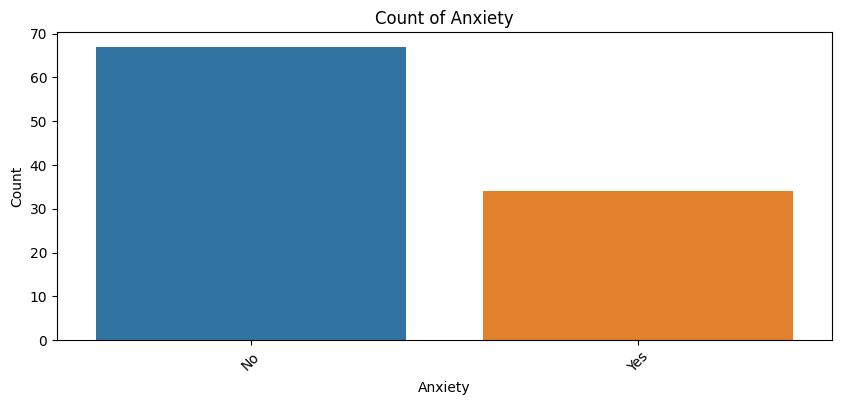

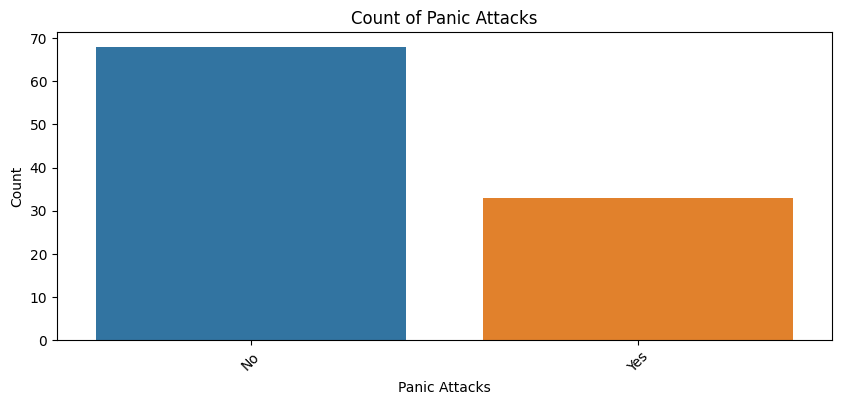

In [136]:
categorical_columns = ["Course", "Gender","Year", "CGPA", "Married", "Depression","Anxiety", "Panic Attacks"]
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

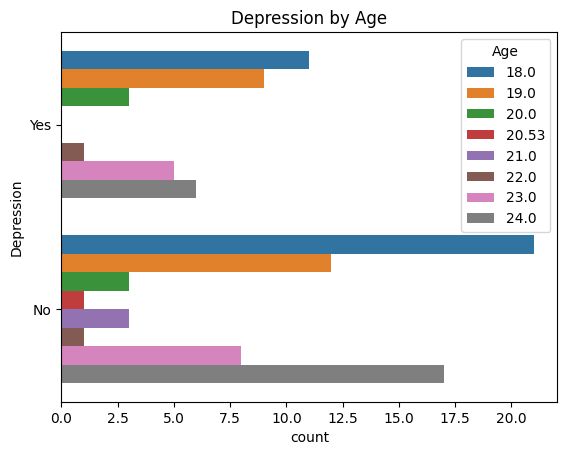

In [137]:
sns.countplot(y="Depression", hue="Age", data=df)
plt.title("Depression by Age")
plt.show()

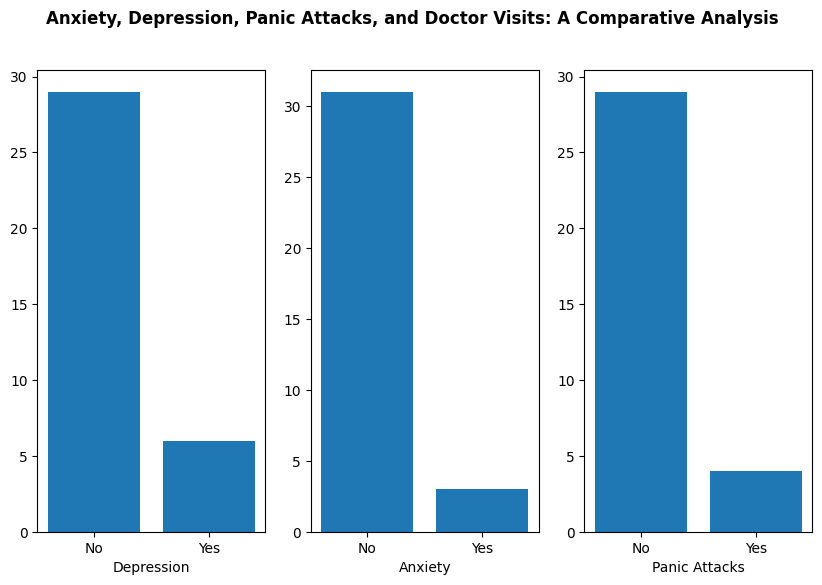

In [138]:
fig, axis = plt.subplots(1,3, figsize=(10, 6))
fig.suptitle("Anxiety, Depression, Panic Attacks, and Doctor Visits: A Comparative Analysis",fontweight="bold", size=12)

column_list = ["Depression","Anxiety", "Panic Attacks"]

for i in range(len(column_list)):
    x = df[df[column_list[i]] == 'Yes']['Treated'].value_counts().index.tolist()
    y = df[df[column_list[i]] == 'Yes']['Treated'].value_counts().values.tolist()
    axis[i].bar(x, y)
    axis[i].set_xlabel(column_list[i])

# ML MODELLING

In [139]:
df_1= pd.get_dummies(df, columns=[ "Gender",  "Course", "Year", "CGPA", "Married", "Anxiety", "Panic Attacks", "Treated"], prefix=[ "Gender",  "Course", "Year", "CGPA", "Married", "Anxiety", "Panic Attacks", "Treated"], drop_first = True)

In [140]:
df_1

,Age,Depression,Gender_Male,Course_Accounting,Course_BCS,Course_BENL,Course_Banking Studies,Course_Biomedical science,Course_Biotechnology,Course_Business Administration,...,Year_year 3,Year_year 4,CGPA_2.00 - 2.49,CGPA_2.50 - 2.99,CGPA_3.00 - 3.49,CGPA_3.50 - 4.00,Married_Yes,Anxiety_Yes,Panic Attacks_Yes,Treated_Yes
0,18.0,Yes,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,No,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,19.0,Yes,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,22.0,Yes,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,23.0,No,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21.0,No,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
97,18.0,Yes,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
98,19.0,Yes,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
99,23.0,No,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# THE ML PROBLEM WE WILL BE SOLVING IS PREDICTING WHETHER A STUDENT HAS DEPRESSION OR NOT

In [141]:
df_2=df_1.drop(columns=['Depression'])

In [142]:
X=df_2
y=df_1['Depression']

**WE WILL BE USING RANDOM FOREST**

In [143]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
#importing Random forest model tfor predictions
from sklearn.ensemble import RandomForestClassifier

In [145]:
#creating an object(rf)
rf = RandomForestClassifier()

In [146]:
#fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
#predicting the value from testing dataset
y_pred = rf.predict(X_test)

# EVALUATING THE MODEL

In [148]:
#importing  various functions from sklearn.metrices
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#using accuracy_score function to find the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
#using classification_report function to find precision recall f-1 score and support
report = classification_report(y_test, y_pred)
# using confusion_matrix function to find true positives,true negatives, false positives and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

          No       0.71      0.92      0.80        13
         Yes       0.75      0.38      0.50         8

    accuracy                           0.71        21
   macro avg       0.73      0.65      0.65        21
weighted avg       0.72      0.71      0.69        21

Confusion Matrix:
 [[12  1]
 [ 5  3]]
